In [124]:
from transpile_benchy.interface import QASMBench, RedQueen

qasm_bench_s = QASMBench(size="small")
qasm_bench_m = QASMBench(size="medium")
# redqueen = RedQueen()

from transpile_benchy.metrics import DepthMetric

depth_metric = DepthMetric()

from qiskit.transpiler import CouplingMap

coupling_map = CouplingMap.from_grid(6, 6)
# coupling_map = CouplingMap.from_grid(2,2)
# coupling_map = CouplingMap.from_heavy_hex(5)

from virtual_swap.pass_managers import SabreVS, SabreQiskit  # , QiskitLevel3

In [125]:
# # 5Q backend = provider.backend.ibmq_quito
# from qiskit.providers.fake_provider import FakeQuitoV2
# coupling_map = FakeQuitoV2().target.build_coupling_map()
# # # GHZ/BV, QV, EfficientSU2-linear, EfficientSU2-full, Two-local linear, QFT,
# # from qiskit import QuantumCircuit
# # def ghz():
# #     num_qubits = 5
# #     qc = QuantumCircuit(num_qubits, num_qubits, name="ghz")

# #     # Create a GHZ state
# #     qc.h(0)
# #     for i in range(num_qubits - 1):
# #         qc.cx(i, i + 1)
# #     # Insert a barrier before measurement
# #     qc.barrier()
# #     # Measure all of the qubits in the standard basis
# #     for i in range(num_qubits):
# #         qc.measure(i, i)
# #     return qc

# # from qiskit.circuit.library import QuantumVolume
# # def qv():
# #     return QuantumVolume(5, seed=0)

In [126]:
# 5Q backend = provider.backend.ibmq_quito
# 20Q backend = provider.backend.ibmq_mumbai
from typing import Callable, List
from transpile_benchy.interface import QiskitInterface

from qiskit.circuit.library import QFT

qft_8 = QFT(8)
qft_8.name = "qft_8"
qft_12 = QFT(12)
qft_12.name = "qft_12"
qft_16 = QFT(16)
qft_16.name = "qft_16"
qft_20 = QFT(20)
qft_20.name = "qft_20"
qft_24 = QFT(24)
qft_24.name = "qft_24"
qft_28 = QFT(28)
qft_28.name = "qft_28"
qft_32 = QFT(32)
qft_32.name = "qft_32"
qft_36 = QFT(36)
qft_36.name = "qft_36"


# FIXME seems to be a bug , missing iteration over last element in the list
class QiskitFunctions(QiskitInterface):
    def _get_qiskit_functions(self) -> List[Callable]:
        return [qft_8, qft_12, qft_16, qft_20, qft_24, qft_28, qft_32, qft_36]


qiskit_functions = QiskitFunctions()

In [129]:
import logging
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.INFO)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

benchmark = Benchmark(
    transpilers=[
        SabreQiskit(coupling_map),  # , cx_basis=True),
        SabreVS(coupling_map, logger=transpile_benchy_logger)  # , cx_basis=True),
        # QiskitLevel3(coupling_map),
    ],
    # submodules=[qiskit_functions],
    submodules=[qasm_bench_m],
    metrics=[depth_metric],
    logger=transpile_benchy_logger,
    num_runs=3,
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...
Running circuits for QASMBench:   0%|          | 0/20 [00:00<?, ?it/s]

debug best layout cost 284


INFO:transpile_benchy:Accepted CNS subs: 84


debug best layout cost 310


INFO:transpile_benchy:Accepted CNS subs: 82


debug best layout cost 310


INFO:transpile_benchy:Accepted CNS subs: 88
Running circuits for QASMBench:   5%|▌         | 1/20 [02:42<51:22, 162.25s/it]

debug best layout cost 82


INFO:transpile_benchy:Accepted CNS subs: 1


debug best layout cost 79


INFO:transpile_benchy:Accepted CNS subs: 0


debug best layout cost 70


INFO:transpile_benchy:Accepted CNS subs: 3
Running circuits for QASMBench:  10%|█         | 2/20 [03:26<27:54, 93.00s/it] 

debug best layout cost 30


INFO:transpile_benchy:Accepted CNS subs: 1


debug best layout cost 33


INFO:transpile_benchy:Accepted CNS subs: 5
INFO:transpile_benchy:Accepted CNS subs: 2
Running circuits for QASMBench:  15%|█▌        | 3/20 [03:40<16:05, 56.78s/it]

debug best layout cost 30
debug best layout cost 14


INFO:transpile_benchy:Accepted CNS subs: 12


debug best layout cost 14


INFO:transpile_benchy:Accepted CNS subs: 16


debug best layout cost 14


INFO:transpile_benchy:Accepted CNS subs: 11
Running circuits for QASMBench:  20%|██        | 4/20 [04:15<12:50, 48.18s/it]

debug best layout cost 194


INFO:transpile_benchy:Accepted CNS subs: 29


debug best layout cost 186


INFO:transpile_benchy:Accepted CNS subs: 29


"It was not possible to use the basis ['u', 'cx', 'iswap', 'swap']"
debug best layout cost 176


INFO:transpile_benchy:Accepted CNS subs: 29
Running circuits for QASMBench:  25%|██▌       | 5/20 [05:38<15:11, 60.73s/it]

"It was not possible to use the basis ['u', 'cx', 'iswap', 'swap']"
debug best layout cost 41


INFO:transpile_benchy:Accepted CNS subs: 3


debug best layout cost 41


INFO:transpile_benchy:Accepted CNS subs: 2


debug best layout cost 38


INFO:transpile_benchy:Accepted CNS subs: 5
Running circuits for QASMBench:  30%|███       | 6/20 [05:51<10:25, 44.69s/it]

debug best layout cost 26


INFO:transpile_benchy:Accepted CNS subs: 17


debug best layout cost 30


INFO:transpile_benchy:Accepted CNS subs: 10


debug best layout cost 25


INFO:transpile_benchy:Accepted CNS subs: 9
Running circuits for QASMBench:  35%|███▌      | 7/20 [11:00<28:21, 130.89s/it]

debug best layout cost 145


INFO:transpile_benchy:Accepted CNS subs: 29


debug best layout cost 157


INFO:transpile_benchy:Accepted CNS subs: 29


debug best layout cost 157


INFO:transpile_benchy:Accepted CNS subs: 32
Running circuits for QASMBench:  45%|████▌     | 9/20 [12:05<15:18, 83.51s/it] 

debug best layout cost 150


INFO:transpile_benchy:Accepted CNS subs: 33


debug best layout cost 163


INFO:transpile_benchy:Accepted CNS subs: 34


debug best layout cost 164


INFO:transpile_benchy:Accepted CNS subs: 32
Running circuits for QASMBench:  50%|█████     | 10/20 [13:04<12:51, 77.17s/it]

debug best layout cost 174


INFO:transpile_benchy:Accepted CNS subs: 19


debug best layout cost 183


INFO:transpile_benchy:Accepted CNS subs: 21


debug best layout cost 177


INFO:transpile_benchy:Accepted CNS subs: 25
Running circuits for QASMBench:  55%|█████▌    | 11/20 [14:04<10:51, 72.43s/it]

debug best layout cost 445


INFO:transpile_benchy:Accepted CNS subs: 25


"It was not possible to use the basis ['u', 'cx', 'iswap', 'swap']"
debug best layout cost 419


INFO:transpile_benchy:Accepted CNS subs: 25


"It was not possible to use the basis ['u', 'cx', 'iswap', 'swap']"
debug best layout cost 431


INFO:transpile_benchy:Accepted CNS subs: 87
Running circuits for QASMBench:  60%|██████    | 12/20 [16:44<12:53, 96.70s/it]

debug best layout cost 182


INFO:transpile_benchy:Accepted CNS subs: 26


debug best layout cost 170


INFO:transpile_benchy:Accepted CNS subs: 36


debug best layout cost 163


INFO:transpile_benchy:Accepted CNS subs: 29
Running circuits for QASMBench:  65%|██████▌   | 13/20 [17:45<10:07, 86.79s/it]

debug best layout cost 48


INFO:transpile_benchy:Accepted CNS subs: 5


debug best layout cost 69


INFO:transpile_benchy:Accepted CNS subs: 4


debug best layout cost 66


INFO:transpile_benchy:Accepted CNS subs: 3
Running circuits for QASMBench:  70%|███████   | 14/20 [18:04<06:43, 67.22s/it]

debug best layout cost 36


INFO:transpile_benchy:Accepted CNS subs: 12


debug best layout cost 41


INFO:transpile_benchy:Accepted CNS subs: 5


debug best layout cost 43


INFO:transpile_benchy:Accepted CNS subs: 15
Running circuits for QASMBench:  75%|███████▌  | 15/20 [18:32<04:37, 55.58s/it]

debug best layout cost 47


INFO:transpile_benchy:Accepted CNS subs: 12


debug best layout cost 44


INFO:transpile_benchy:Accepted CNS subs: 12


debug best layout cost 49


INFO:transpile_benchy:Accepted CNS subs: 14
Running circuits for QASMBench:  80%|████████  | 16/20 [18:58<03:07, 46.86s/it]

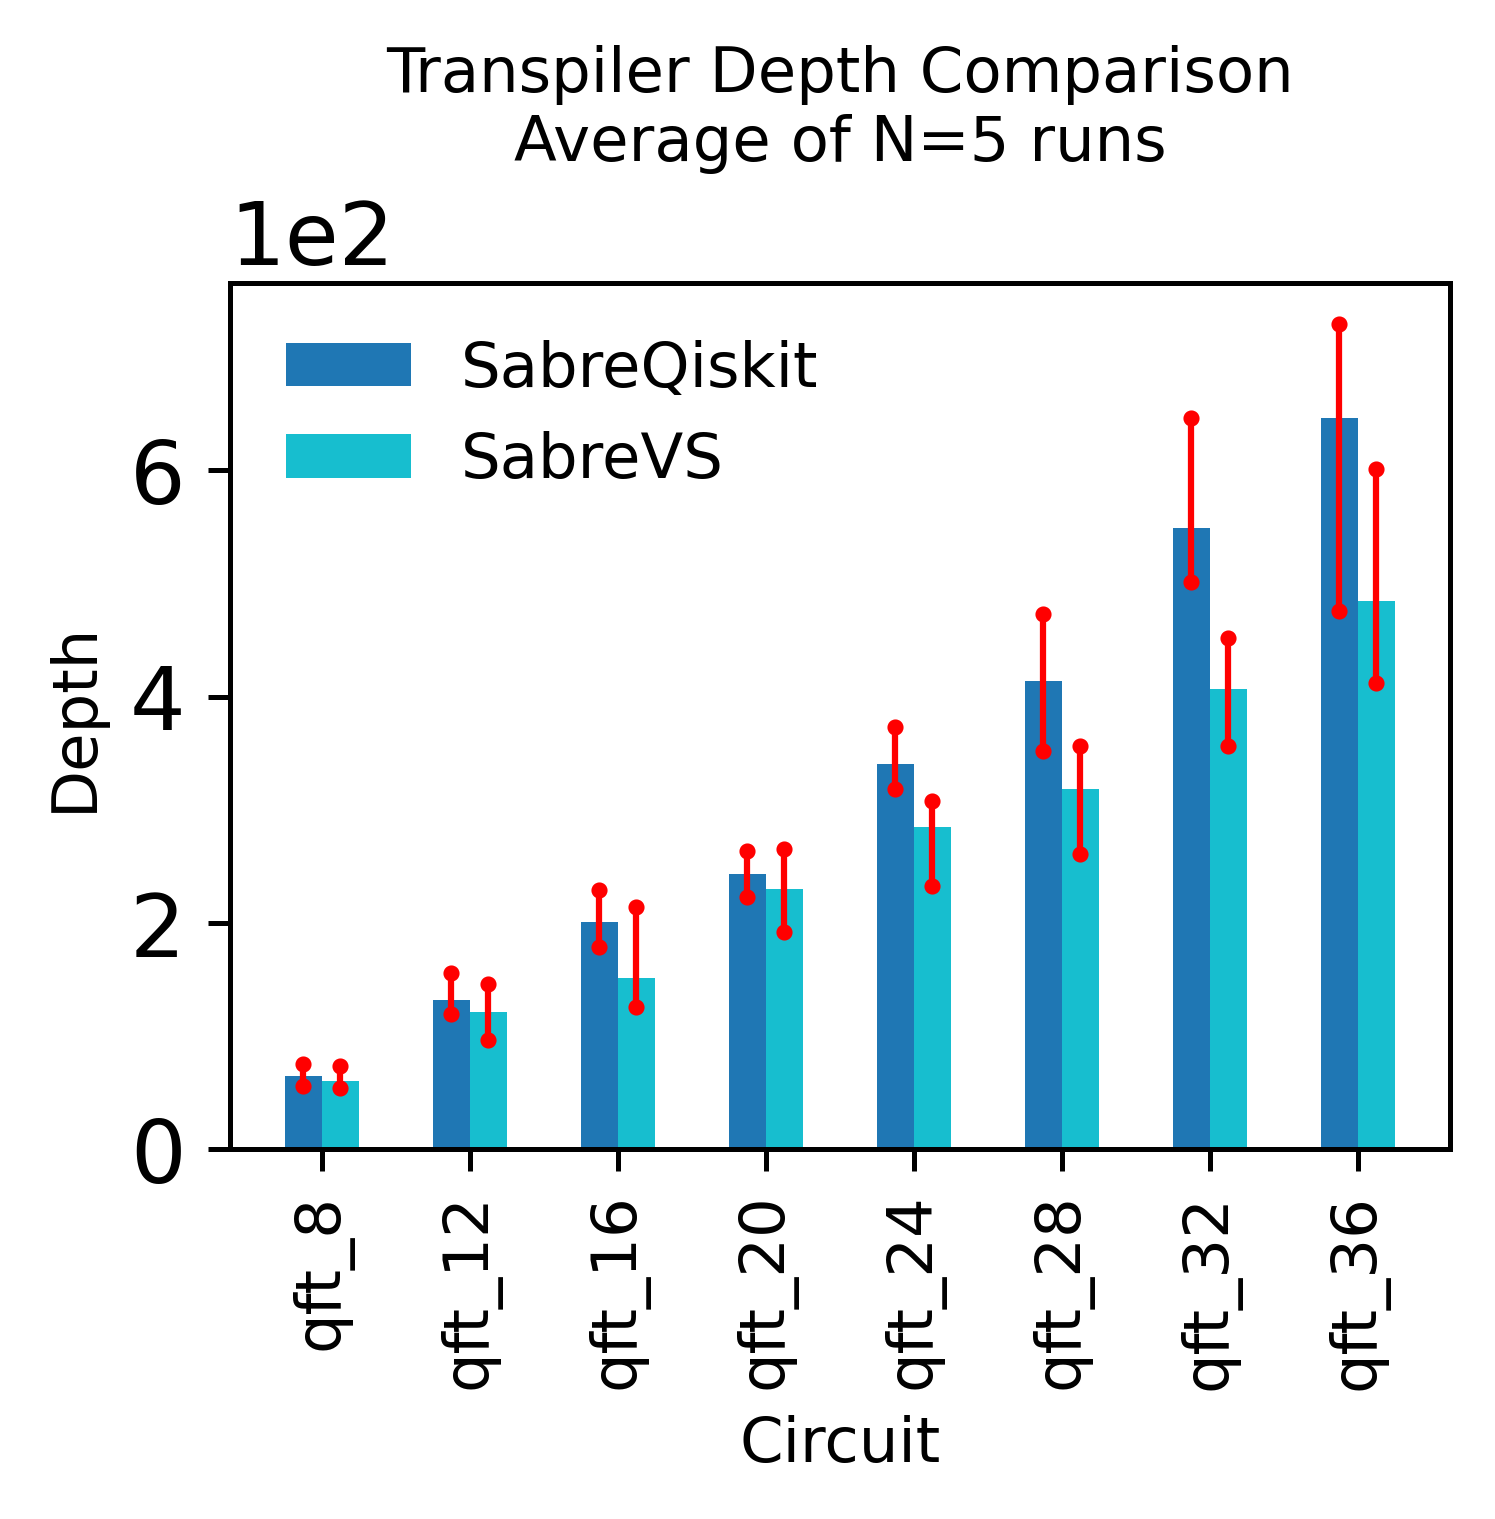

In [ ]:
benchmark.plot()

### Below used for debugging indivudal circuit runs


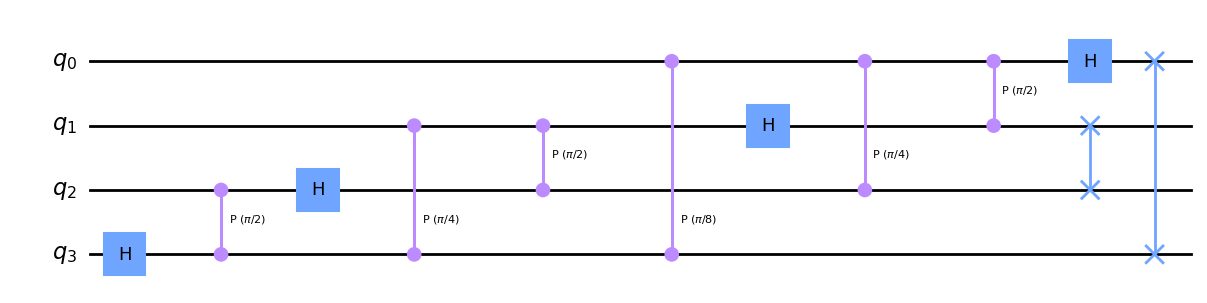

In [105]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from qiskit import QuantumCircuit

# qc = EfficientSU2(5, entanglement="full")
qc = QFT(4)
# from qiskit import QuantumCircuit
# qc = QuantumCircuit(3)
# qc.ccx(0,1,2)
qc.decompose().draw("mpl")

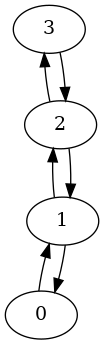

In [109]:
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.transpiler.coupling import CouplingMap

coupling_map = FakeQuitoV2().target.build_coupling_map()
coupling_map = CouplingMap.from_line(4)
# coupling_map = CouplingMap.from_grid(3,3)
coupling_map.draw()

In [110]:
# from qiskit.circuit.library import QFT

# # coupling_map = CouplingMap.from_line(5)
# coupling_map = CouplingMap.from_grid(5, 6)
# # qc = QFT(8)
# # qc = QuantumCircuit(8)
# # qc.h(0)
# # qc.cx(0, 1)
# # qc.cx(1, 2)
# # qc.cx(2, 3)
# # # qc.cx(3, 4)
# # qc.cx(4, 5)
# # qc.cx(5, 6)
# # qc.cx(6, 7)
# qc.decompose().draw(output="mpl")

debug best layout cost 13
13


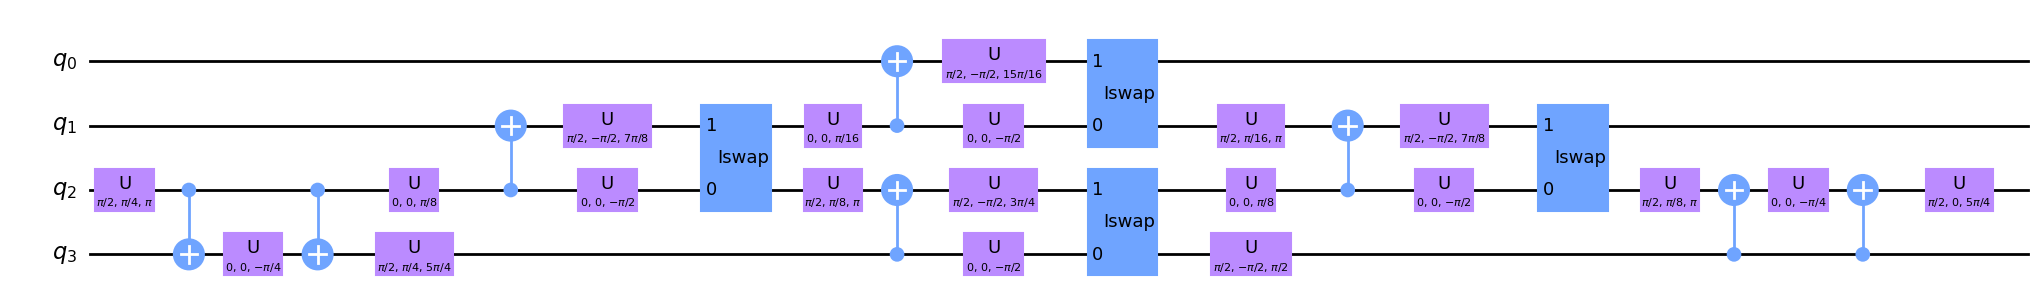

In [119]:
from virtual_swap.pass_managers import SabreVS, SabreQiskit
from transpile_benchy.metrics import DepthMetric

for _ in range(1):
    runner = SabreVS(coupling_map)  # , cx_basis=True)
    transp = runner.run(qc)
    # mid0 = runner.pm.property_set["mid0"]
    mid = runner.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(transp))
mid.draw(output="mpl", fold=-1, filename="qft_vs.svg")
# transp.draw(output="mpl")

In [120]:
# runner.pm.property_set["layout"]

17
17
17
15
15
17
15
15
17
17


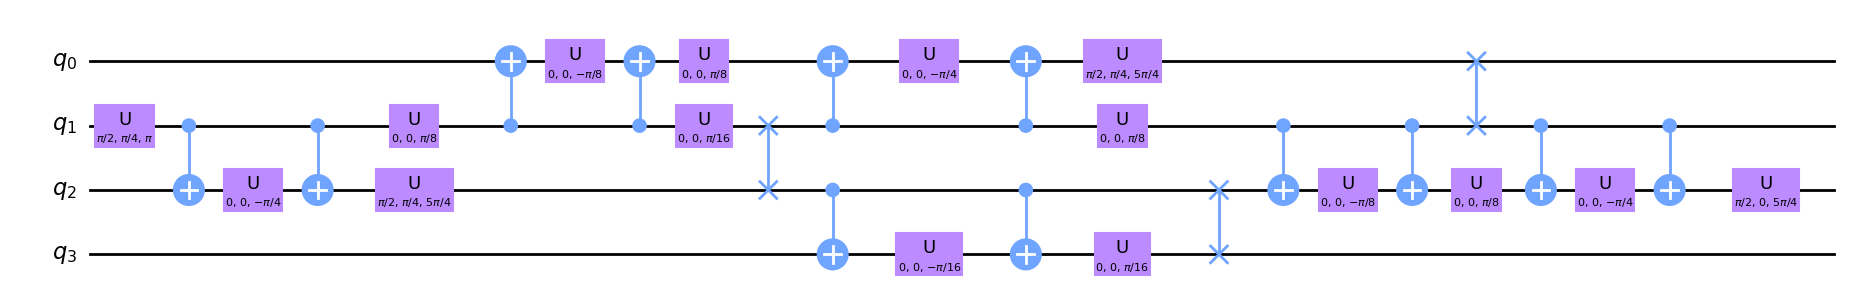

In [121]:
# set original qc to use
from qiskit import transpile

# qc2 = transpile(qc, initial_layout=runner.pm.property_set["layout"], coupling_map=coupling_map)
# qc2 = transpile(qc, coupling_map=coupling_map, optimization_level=3)
for _ in range(10):
    pm2 = SabreQiskit(coupling_map)  # , cx_basis=True)
    qc2 = pm2.run(qc)
    mid = pm2.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(qc2))
mid.draw(output="mpl", fold=-1, filename="qft_qiskit.svg")

In [122]:
# qc2.draw(output="mpl")

In [123]:
# from qiskit.quantum_info import Operator
# Operator(mid).equiv(qc2)